In [3]:
from biocrnpyler import *

import bioscrape
import numpy as np
import pylab as plt
import pandas as pd

In [4]:
A = Species("A", material_type = "m1", attributes = ["attribute1", "attribute2"])
print(A)

m1_A_attribute1_attribute2


In [5]:
A2 = Species("A")
print(A2)
print(A == A2)

A
False


In [6]:
A = Species("A")
B = Species("B")

C1 = Complex([A, B])
print("Complex([A, B]):", C1)

C2 = Complex([B, A])
print("Complex([B, A]):", C2)

print("C1 == C2?", C1 == C2)

Complex([A, B]): complex_A_B_
Complex([B, A]): complex_A_B_
C1 == C2? True


In [9]:
# Creating a reaction 2A --> B
R1 = Reaction.from_massaction([A, A], [B], k_forward = 1.0)

#You can print a reaction in two ways
print(R1)
print(R1.pretty_print())

2A --> B
2A --> B
 Kf=k_forward * A^2
  k_forward=1.0



In [11]:
# Creating a reversible reaction 2A --> B
R2 = Reaction.from_massaction([A, B], [C1], k_forward = 10.0, k_reverse = 2.0)

#You can print a reaction in two ways
print(R2)
print(R2.pretty_print())

A+B <--> complex[A:B]
A+B <--> complex[A:B]
 Kf=k_forward * A * B
 Kr=k_reverse * complex_A_B_
  k_forward=10.0
  k_reverse=2.0



In [12]:
CRN = ChemicalReactionNetwork(species = [A, B, C1], reactions = [R1, R2])

print(CRN.pretty_print(show_rates = True))

Species(N = 3) = {
B (@ 0),  complex[A:B] (@ 0),  A (@ 0),  
}

Reactions (2) = [
0. 2A --> B
 Kf=k_forward * A^2
  k_forward=1.0

1. A+B <--> complex[A:B]
 Kf=k_forward * A * B
 Kr=k_reverse * complex_A_B_
  k_forward=10.0
  k_reverse=2.0

]


In [14]:
CRN.write_sbml_file("crnl.xml")

print(open("crnl.xml").read())

<?xml version="1.0" encoding="UTF-8"?>
<sbml xmlns="http://www.sbml.org/sbml/level3/version2/core" level="3" version="2">
  <model id="biocrnpyler_679281" name="biocrnpyler_679281" substanceUnits="mole" timeUnits="second" volumeUnits="litre" areaUnits="square_metre" lengthUnits="metre" extentUnits="mole">
    <listOfUnitDefinitions>
      <unitDefinition id="square_metre">
        <listOfUnits>
          <unit kind="metre" exponent="2" scale="0" multiplier="1"/>
        </listOfUnits>
      </unitDefinition>
    </listOfUnitDefinitions>
    <listOfCompartments>
      <compartment id="default" name="default" spatialDimensions="3" size="1e-06" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="A" name="A" compartment="default" initialConcentration="0" substanceUnits="mole" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="B" name="B" compartment="default" initialConcentration="0" substanceUnits="mole" hasOnlySubs

Text(0, 0.5, 'concentration')

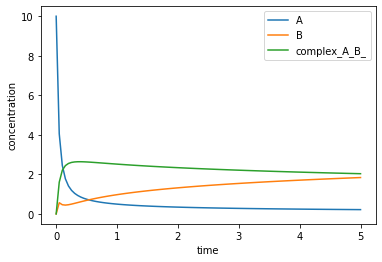

In [15]:
%matplotlib inline

x0 = {str(A):10}
time = np.linspace(0, 5, 100)

R = CRN.simulate_with_bioscrape_via_sbml(timepoints = time, initial_condition_dict = x0)

plt.plot(R['time'], R[str(A)], label = str(A))
plt.plot(R['time'], R[str(B)], label = str(B))
plt.plot(R['time'], R[str(C1)], label = str(C1))
plt.legend()
plt.xlabel("time"); plt.ylabel("concentration")

In [16]:
R = Species("Regulator")
hill_pos = HillPositive(k=1, s1=R, K=5, n=2)

r_hill_pos = Reaction([A], [B], propensity_type = hill_pos)

print(r_hill_pos.pretty_print())

A --> B
 Kf = k Regulator^n / ( K^n + Regulator^n )
  k=1
  K=5
  n=2



In [17]:
#For general propensities use this format

# Create some parameters
k1 = ParameterEntry("k1", 1.11)
k2 = ParameterEntry("k2", 2.22)

#type the string as a rate then decalre the species and parameters
general = GeneralPropensity(f'k1*2 - k2/{str(C1)}^2', propensity_species=[C1], propensity_parameters=[k1, k2])

r_general = Reaction([A, B], [C1], propensity_type = general)

print(r_general.pretty_print())

A+B --> complex[A:B]
k1*2 - k2/complex_A_B_^2
  k1=1.11
  k2=2.22



# Do the homework